**Joachim Tan , 720000009** `COM3021 - Assignment 1`

In [19]:
%%bigquery data

SELECT subreddit, COUNT(DISTINCT author) AS unique_users_count
FROM `fh-bigquery.reddit_comments.2014`
GROUP BY subreddit
ORDER BY unique_users_count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

What were the `top 50` **most popular subreddits** in terms of the **number of active users**?

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import powerlaw
from sklearn.cluster import KMeans

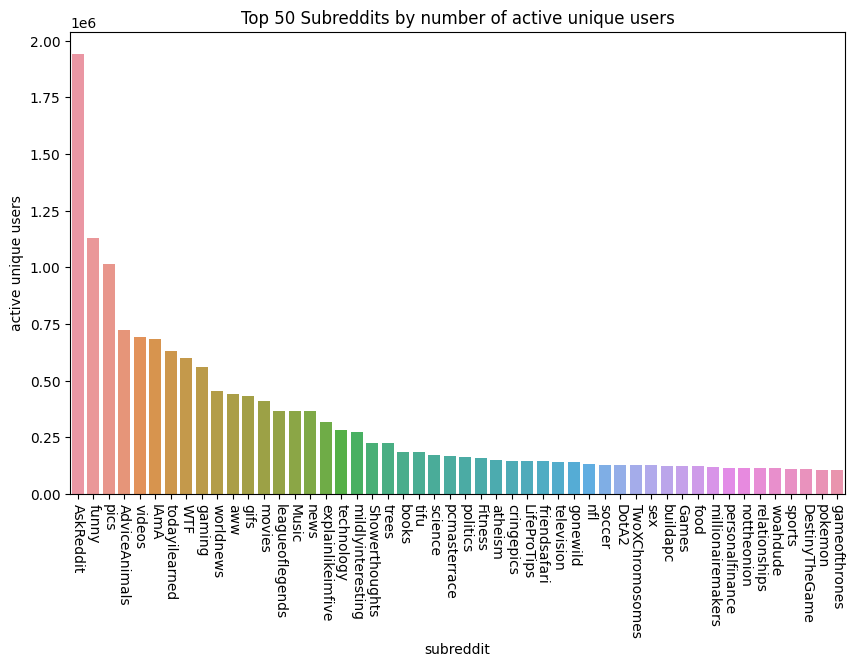

In [3]:
top50 = data.head(50)

top50grph = sns.barplot(x='subreddit', y='unique_users_count', data=top50)

# Adding labels and title
plt.gcf().set_size_inches(10, 6)  # Increase width and height as needed
plt.xticks(rotation=-90)
plt.xlabel('subreddit')
plt.ylabel('active unique users')
plt.title('Top 50 Subreddits by number of active unique users')

# Display the plot
plt.show()

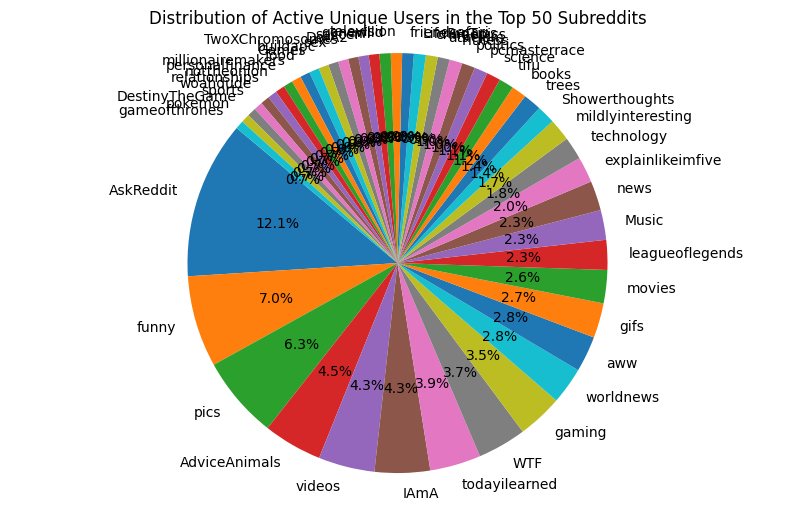

In [5]:
# Select the top 50 subreddits
top50 = data.head(50).copy()

# Calculate the total unique users for the top 50 subreddits
total_unique_users = top50['unique_users_count'].sum()

# Calculate the percentage of unique users contributed by each subreddit in the top 50
top50['user_percentage'] = (top50['unique_users_count'] / total_unique_users) * 100

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(top50['user_percentage'], labels=top50['subreddit'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Adding a title
plt.title('Distribution of Active Unique Users in the Top 50 Subreddits')

plt.show()

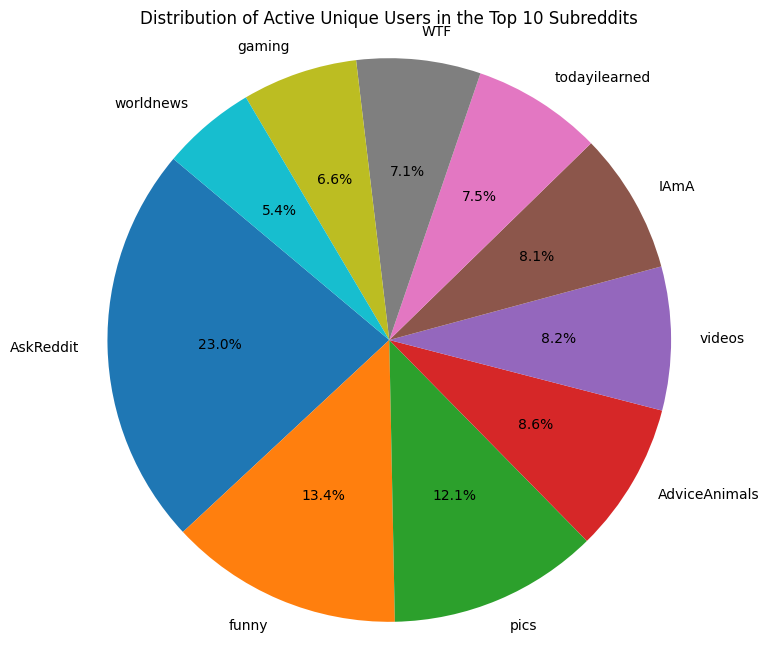

In [6]:
# Select the top 10 subreddits
top10 = data.head(10).copy()

# Calculate the total unique users for the top 10 subreddits
total_unique_users = top10['unique_users_count'].sum()

# Calculate the percentage of unique users contributed by each subreddit in the top 10
top10['user_percentage'] = (top10['unique_users_count'] / total_unique_users) * 100

# Create a pie chart for the top 10 subreddits
plt.figure(figsize=(8, 8))
plt.pie(top10['user_percentage'], labels=top10['subreddit'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Adding a title
plt.title('Distribution of Active Unique Users in the Top 10 Subreddits')

plt.show()

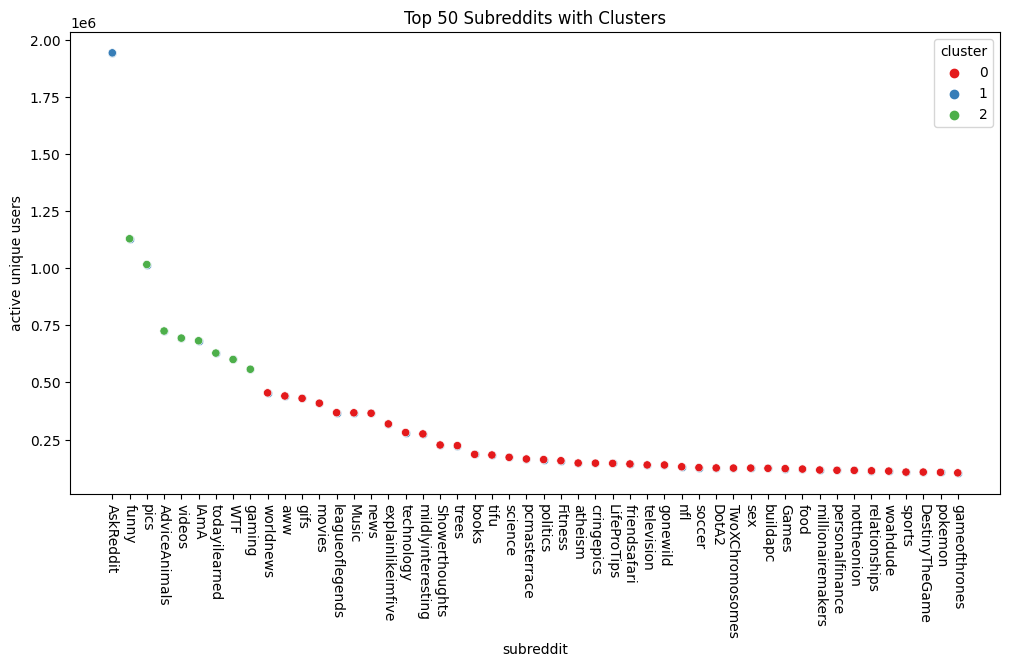

In [6]:
# Select the top 50 subreddits
top50 = data.head(50).copy()

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='subreddit', y='unique_users_count', data=top50)  # Replace 'feature1' and 'feature2' with actual features

# Applying K-Means clustering
features = top50[['unique_users_count']]  # Select features for clustering
kmeans = KMeans(n_clusters=3, n_init=10)  # Choose the number of clusters
top50['cluster'] = kmeans.fit_predict(features)

# Visualize clusters with different colors
sns.scatterplot(x='subreddit', y='unique_users_count', hue='cluster', data=top50, palette='Set1')

# Adding labels and title
plt.xlabel('subreddit')
plt.ylabel('active unique users')
plt.title('Top 50 Subreddits with Clusters')
plt.xticks(rotation=-90)

plt.show()

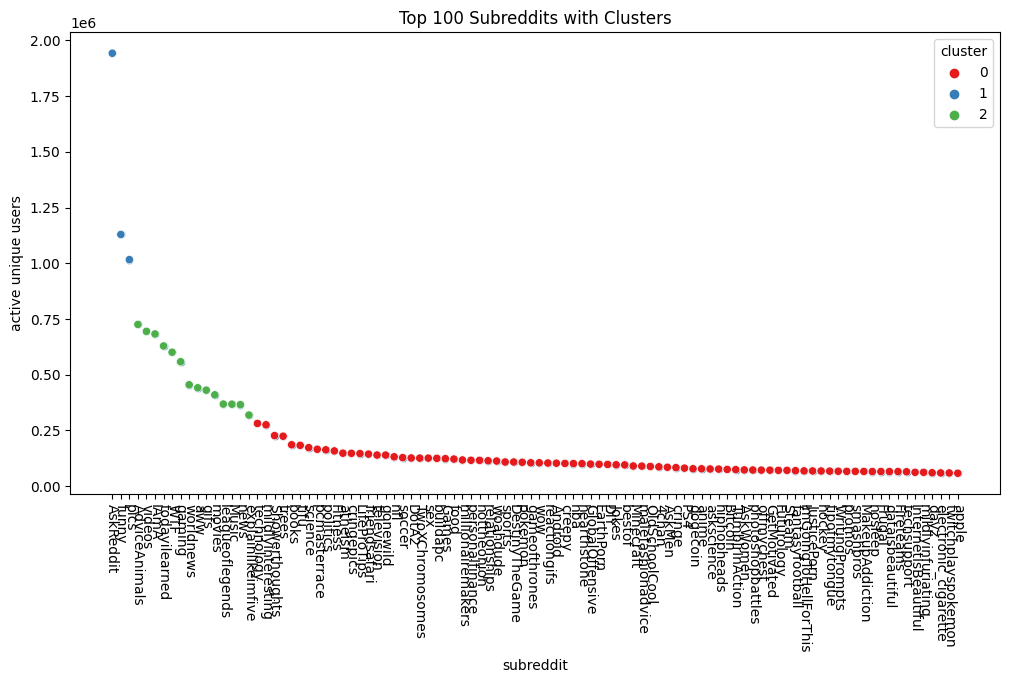

In [7]:
# Select the top 100 subreddits
top50 = data.head(100).copy()

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='subreddit', y='unique_users_count', data=top50)  # Replace 'feature1' and 'feature2' with actual features

# Applying K-Means clustering
features = top50[['unique_users_count']]  # Select features for clustering
kmeans = KMeans(n_clusters=3, n_init=10)  # Choose the number of clusters
top50['cluster'] = kmeans.fit_predict(features)

# Visualize clusters with different colors
sns.scatterplot(x='subreddit', y='unique_users_count', hue='cluster', data=top50, palette='Set1')

# Adding labels and title
plt.xlabel('subreddit')
plt.ylabel('active unique users')
plt.title('Top 100 Subreddits with Clusters')
plt.xticks(rotation=-90)

plt.show()

In [8]:
top50

,subreddit,unique_users_count,cluster
0,AskReddit,1942569,2
1,funny,1128979,1
2,pics,1016309,1
3,AdviceAnimals,725298,1
4,videos,694278,1
5,IAmA,682596,1
6,todayilearned,628701,1
7,WTF,600692,1
8,gaming,557986,1
9,worldnews,454644,0


What were the `top 50` **most popular subreddits** in terms of the **number of active users**? 

- The top 50 popular subreddits are listed in a list above. We can see in the bar chart that the top 10 subreddits have significantly higher number of active users compared to the following 40 subreddits. This is further strengthened by the pie chart of the top 50 subreddits where we see that the top 10 subreddits make up around half of total number of active users. To compare the distribution of number of active users amongst the top 10 I used a pie chart and we can see that the top subreddit ("AskReddit") commands 23% of the total number of active users visiting the top 10 subreddits. We also analysed it using a Scatter plot, plotting the top 50 subreddits and top 100 subreddits and we noticed that the top 10 are often in a cluster separate from the rest. We also noticed that the number of active users seems to flatten out or "stabilize" at around 100,000, this could be the average number of active users a popular subreddit receives as we can also see the scatterplot of the top 100 subreddits flattening out. The top 10 could be seen as exceptionally popular subreddits.

What does the **Probability Density Function (PDF)** of the **number of active users per subreddit** look like for **all subreddits?**

In [20]:
# Extract the 'unique_users_count' values from the DataFrame
unique_users = data['unique_users_count'].values

# Create a power law distribution fit
fit = powerlaw.Fit(unique_users)

Calculating best minimal value for power law fit


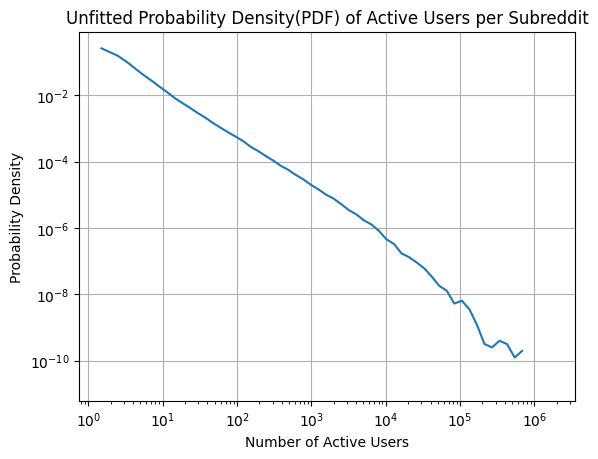

In [23]:
# Unfitted Plot
powerlaw.plot_pdf(unique_users)
plt.xlabel("Number of Active Users")
plt.ylabel("Probability Density")
plt.title("Unfitted Probability Density(PDF) of Active Users per Subreddit")
plt.grid()
plt.show()

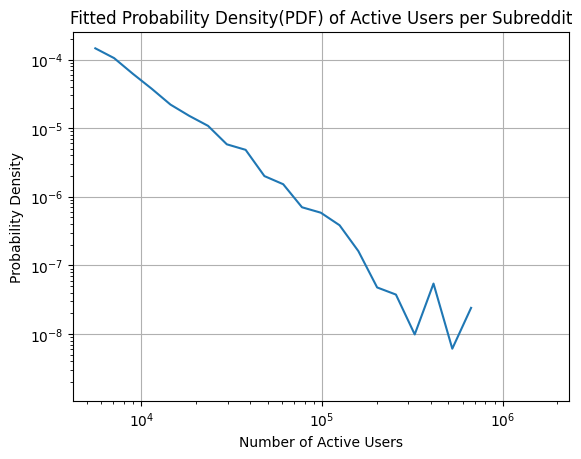

In [24]:
fit.plot_pdf()
plt.xlabel("Number of Active Users")
plt.ylabel("Probability Density")
plt.title("Fitted Probability Density(PDF) of Active Users per Subreddit")
plt.grid()
plt.show()

What does the **Probability Density Function (PDF)** of the **number of active users per subreddit** look like for **all subreddits?**

- The above suggests a non-uniform distribution of user engagement on the platform.  The curve starts high on the left indicating that a large number of subreddits have relatively few active users(in the 10^-4 range), as we move to the right of the graph the curve drops, indicating that fewer subreddits have a large number of active users(in the 10^6 range). It indicates the presence of highly popular subreddits. There is a noticable bump or increase in the probability density around the 10^5 to the 10^6 range. This could represent a group of subreddits that have a higher than expected number of active users compared to the trend. We also notice that towards the far right of the graph, the curve becomes more irregular suggesting that there is sparse data in this range, due to fewer subreddits having such a high number of users.

What is the **proportion** between the `number of users` in the **ith popular subreddit** compared to the (i + 1)th for i ∈ [1...100]? **Comment** on **how fast the popularity drops** and how this **ratio/proportion changes with i**.

In [5]:
top100 = data.head(101).copy()
top100['proportion'] = top100['unique_users_count'] / top100['unique_users_count'].shift(-1)

# Drop the last row as it will have NaN values (no next subreddit for the last one)
top100 = top100[:-1]

# Display the resulting DataFrame with proportions
print(top100)

               subreddit  unique_users_count  proportion
0              AskReddit             1942569    1.720642
1                  funny             1128979    1.110862
2                   pics             1016309     1.40123
3          AdviceAnimals              725298     1.04468
4                 videos              694278    1.017114
..                   ...                 ...         ...
95     mildlyinfuriating               61592    1.029364
96                  dayz               59835    1.014565
97  electronic_cigarette               58976    1.002635
98    twitchplayspokemon               58821    1.021748
99                 apple               57569    1.000904

[100 rows x 3 columns]


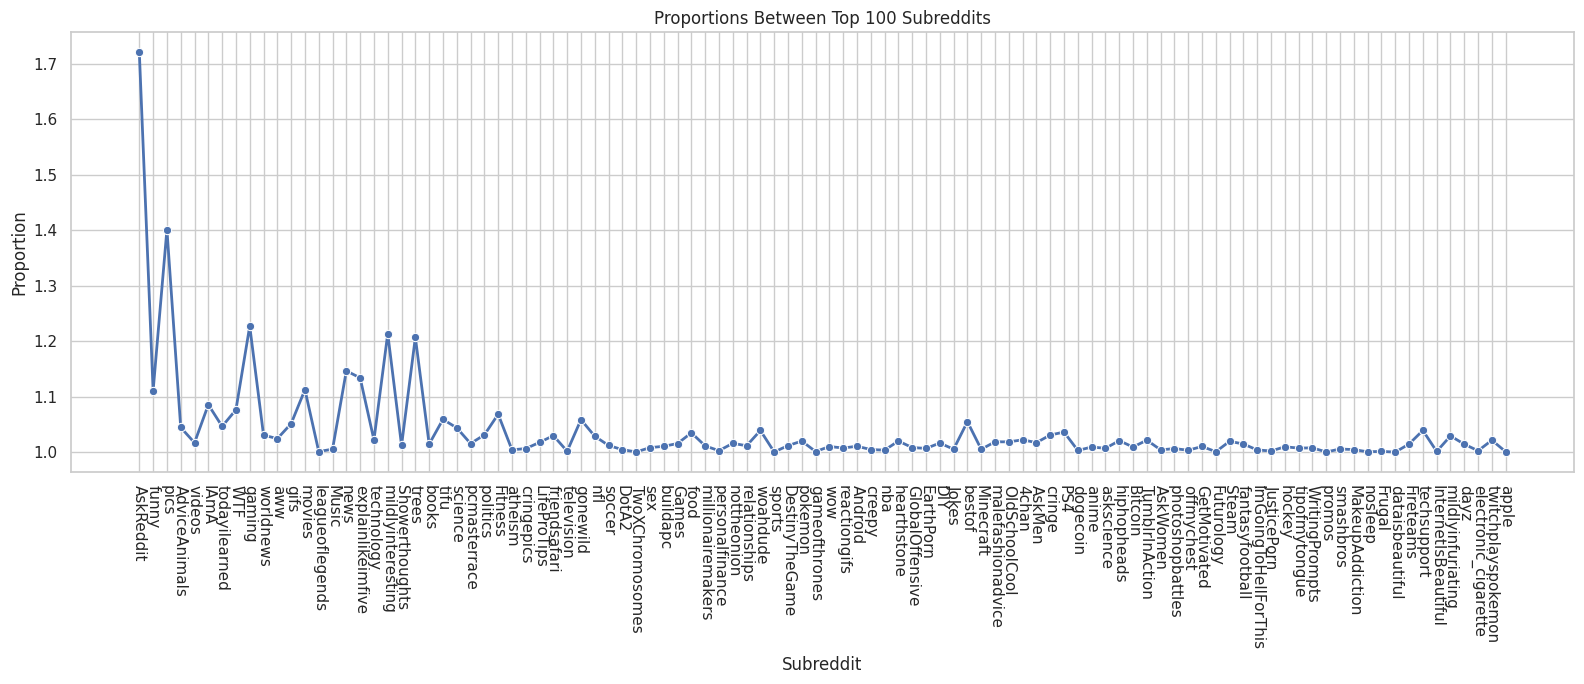

In [9]:
# Set the style for Seaborn (optional)
sns.set(style="whitegrid")

# Create the line plot
plt.figure(figsize=(16, 7))  # Adjust the figure size as needed
sns.lineplot(data=top100, x='subreddit', y='proportion', marker='o', linewidth=2)

# Customize the plot's appearance
plt.title('Proportions Between Top 100 Subreddits')
plt.xlabel('Subreddit')
plt.xticks(rotation=-90)  # Rotate x-axis labels for readability
plt.ylabel('Proportion')

# Show the plot
plt.tight_layout()  # Ensure labels are not cut off
plt.show()

What is the **proportion** between the `number of users` in the **ith popular subreddit** compared to the (i + 1)th for i ∈ [1...100]? **Comment** on **how fast the popularity drops** and how this **ratio/proportion changes with i**.

- We can see a initial sharp decline, the very first subreddit, being the most popular has a larger proportion of users compared to the second-most popular subreddit. This means the most popular subreddit has significantly more users than the next one. We then see a gradual decrease in proportion, after the initial sharp decline, the proportions start to decrease gradually, this suggests that the difference in user count between consecutively ranked subreddits becomes smaller as we move down the popularity list. Towards the end we see more consistent proportions, they seem to stabalize around the 1.0 mark suggesting a more even distribution of users amongst the less popular subreddits. There are however occassional peaks throughout the graph that indicate the presence of some subreddits that have a notably higher user count compared to the next subreddit. These however become less pronounced as we move to the right.

How many `comments` does **each** of these **subreddits receive** in a **given hour** of the day (i.e., 1AM, 2AM, 3AM...11PM,12AM)?

In [21]:
# Get number of comments that AskReddit subreddit receives in a given hour of the day

In [8]:
%%bigquery AskReddit_data

SELECT
  EXTRACT(HOUR FROM TIMESTAMP_SECONDS(created_utc)) AS hour_of_day,
  COUNT(*) AS comment_count
FROM `fh-bigquery.reddit_comments.2014`
WHERE subreddit = 'AskReddit'
GROUP BY hour_of_day
ORDER BY hour_of_day;

Query is running:   0%|          |

Downloading:   0%|          |

In [9]:
# Get number of comments that houston subreddit receives in a given hour of the day

In [10]:
%%bigquery houston_data

SELECT EXTRACT(HOUR FROM TIMESTAMP_SECONDS(created_utc)) AS hour_of_day, COUNT(*) AS comment_count
FROM `fh-bigquery.reddit_comments.2014`
WHERE subreddit = 'houston'
GROUP BY hour_of_day
ORDER BY hour_of_day;

Query is running:   0%|          |

Downloading:   0%|          |

In [11]:
# Get number of comments that gaming subreddit receives in a given hour of the day

In [12]:
%%bigquery gaming_data

SELECT EXTRACT(HOUR FROM TIMESTAMP_SECONDS(created_utc)) AS hour_of_day, COUNT(*) AS comment_count
FROM `fh-bigquery.reddit_comments.2014`
WHERE subreddit = 'gaming'
GROUP BY hour_of_day
ORDER BY hour_of_day;

Query is running:   0%|          |

Downloading:   0%|          |

In [13]:
# Get number of comments that askscience subreddit receives in a given hour of the day

In [14]:
%%bigquery askscience_data

SELECT EXTRACT(HOUR FROM TIMESTAMP_SECONDS(created_utc)) AS hour_of_day, COUNT(*) AS comment_count
FROM `fh-bigquery.reddit_comments.2014`
WHERE subreddit = 'askscience'
GROUP BY hour_of_day
ORDER BY hour_of_day;

Query is running:   0%|          |

Downloading:   0%|          |

In [15]:
# Get number of comments that unitedkingdom subreddit receives in a given hour of the day

In [16]:
%%bigquery unitedkingdom_data

SELECT EXTRACT(HOUR FROM TIMESTAMP_SECONDS(created_utc)) AS hour_of_day, COUNT(*) AS comment_count
FROM `fh-bigquery.reddit_comments.2014`
WHERE subreddit = 'unitedkingdom'
GROUP BY hour_of_day
ORDER BY hour_of_day;

Query is running:   0%|          |

Downloading:   0%|          |

In [17]:
AskReddit_data

,hour_of_day,comment_count
0,0,2315849
1,1,2356192
2,2,2433752
3,3,2456242
4,4,2340474
5,5,2099732
6,6,1781999
7,7,1465255
8,8,1201049
9,9,1041922


In [18]:
houston_data

,hour_of_day,comment_count
0,0,7970
1,1,8007
2,2,8176
3,3,8159
4,4,6825
5,5,5225
6,6,3639
7,7,2254
8,8,1590
9,9,1126


In [19]:
gaming_data

,hour_of_day,comment_count
0,0,260728
1,1,253564
2,2,253694
3,3,247532
4,4,233798
5,5,210842
6,6,181177
7,7,151736
8,8,131519
9,9,115014


In [20]:
askscience_data

,hour_of_day,comment_count
0,0,23733
1,1,24058
2,2,24396
3,3,24571
4,4,22859
5,5,20617
6,6,17891
7,7,15176
8,8,13403
9,9,12177


In [21]:
unitedkingdom_data

,hour_of_day,comment_count
0,0,21378
1,1,13286
2,2,8789
3,3,6309
4,4,5192
5,5,5904
6,6,10269
7,7,17827
8,8,28352
9,9,38947


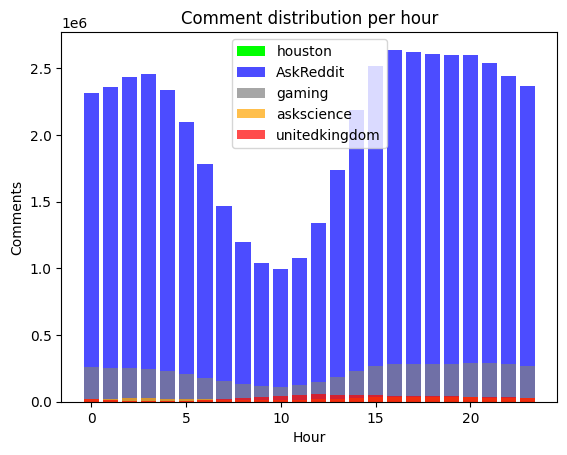

In [29]:
fig, ax = plt.subplots()

#Plot the data
ax.bar(houston_data['hour_of_day'], houston_data['comment_count'], label='houston', color='lime', alpha=1)
ax.bar(AskReddit_data['hour_of_day'], AskReddit_data['comment_count'], label='AskReddit', color='blue', alpha=0.7)
ax.bar(gaming_data['hour_of_day'], gaming_data['comment_count'], label='gaming', color='grey', alpha=0.7)
ax.bar(askscience_data['hour_of_day'], askscience_data['comment_count'], label='askscience', color='orange', alpha=0.7)
ax.bar(unitedkingdom_data['hour_of_day'], unitedkingdom_data['comment_count'], label='unitedkingdom', color='red', alpha=0.7)

# Add labels and legend
ax.set_xlabel('Hour')
ax.set_ylabel('Comments')
ax.set_title('Comment distribution per hour')
ax.legend()

# Show the plot
plt.show()

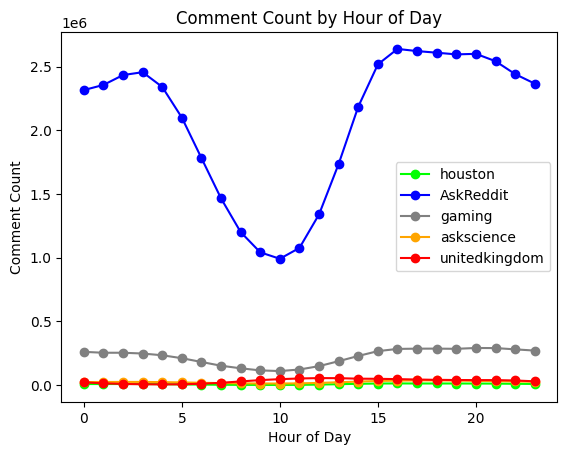

In [23]:
# Create a figure and axis
fig, ax = plt.subplots()

#Plot the data
ax.plot(houston_data['hour_of_day'], houston_data['comment_count'], label='houston', color='lime', marker='o')
ax.plot(AskReddit_data['hour_of_day'], AskReddit_data['comment_count'], label='AskReddit', color='blue', marker='o')
ax.plot(gaming_data['hour_of_day'], gaming_data['comment_count'], label='gaming', color='grey', marker='o')
ax.plot(askscience_data['hour_of_day'], askscience_data['comment_count'], label='askscience', color='orange', marker='o')
ax.plot(unitedkingdom_data['hour_of_day'], unitedkingdom_data['comment_count'], label='unitedkingdom', color='red', marker='o')

# Add labels and legend
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Comment Count')
ax.set_title('Comment Count by Hour of Day')
ax.legend()

# Show the plot
plt.show()

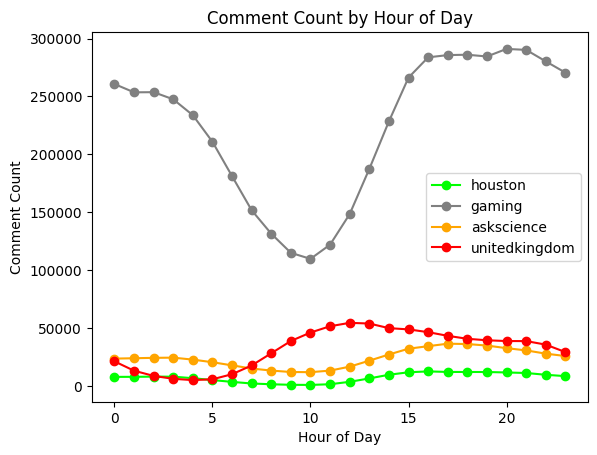

In [30]:
# Create a figure and axis
fig, ax = plt.subplots()

#Plot the data
ax.plot(houston_data['hour_of_day'], houston_data['comment_count'], label='houston', color='lime', marker='o')
ax.plot(gaming_data['hour_of_day'], gaming_data['comment_count'], label='gaming', color='grey', marker='o')
ax.plot(askscience_data['hour_of_day'], askscience_data['comment_count'], label='askscience', color='orange', marker='o')
ax.plot(unitedkingdom_data['hour_of_day'], unitedkingdom_data['comment_count'], label='unitedkingdom', color='red', marker='o')

# Add labels and legend
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Comment Count')
ax.set_title('Comment Count by Hour of Day')
ax.legend()

# Show the plot
plt.show()

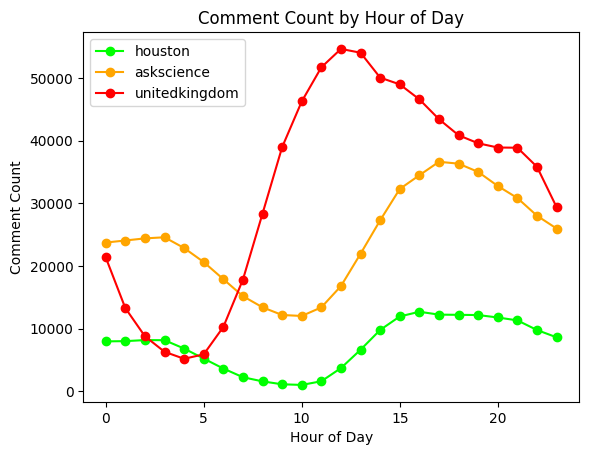

In [32]:
# Create a figure and axis
fig, ax = plt.subplots()

#Plot the data
ax.plot(houston_data['hour_of_day'], houston_data['comment_count'], label='houston', color='lime', marker='o')
ax.plot(askscience_data['hour_of_day'], askscience_data['comment_count'], label='askscience', color='orange', marker='o')
ax.plot(unitedkingdom_data['hour_of_day'], unitedkingdom_data['comment_count'], label='unitedkingdom', color='red', marker='o')

# Add labels and legend
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Comment Count')
ax.set_title('Comment Count by Hour of Day')
ax.legend()

# Show the plot
plt.show()

How many `comments` does **each** of these **subreddits receive** in a **given hour** of the day (i.e., 1AM, 2AM, 3AM...11PM,12AM)?

- You will find the comments each subreddit receives in a given hour of the day above.

When you **plot these curves** where the `x-axis is hours from 0 to 23` and the `y-axis is counts`, can you see **patterns in these curves**? How do these **curves compare** to each other? Do they have **offsets relative to each other**?

- Across all subreddits, there's a notable rise or peak in comments between the 10th-15th hours. This might indicate a common period during which users are less preoccupied and more available for engagement.

- Most subreddits present a bimodal distribution, with two clear activity peaks, likely corresponding to morning and afternoon usage. With the only exception being the unitedkingdom subreddit.

- While overlapping activity periods exist across subreddits, each subreddit retains a distinct engagement rhythm throughout the day. Notably, AskReddit and gaming consistently register above-average engagement levels, settings them apart from their counterparts. The unitedkingdom subreddit stands out due to its early rise and decline, making its activity cycle uniquely compressed.

- AskReddit exhibits two pronounced peaks, with the first around the 3rd-4th hour and the second around the 15th hour. After the latter peak, activity plateaus with a slight dip, followed by a gentle incline as a new cycle commences.

- Mirroring AskReddit's pattern, gaming also displays a bimodal distribution, albeit on a reduced scale. This similiarity suggests comparable user behaviours between the two subreddits even if their total engagement differs.

- askscience & houston both manifest a dual peak pattern, similar to AskReddit and gaming but even more subdued. This indicates that while the user engagement trend remains consistent, the overall volume and intensity vary.

- unitedkingdom diverging from other subreddits, experiences an earlier and more prolonged surge, peaking around the 10th hour. Following the peak, there's a steady decline, bottoming out at the 4th hour - much earlier than other subreddits, which typically see their lowest activity around the 10th hour and slightly increasing in activity post 10th hour till they reach their peaks slightly later around the 15th hour. This suggests that the user base for unitedkingdom might be more aligned with an earlier timezone or has a distinct daily routine.

If you consider the `/r/unitedkingdom` as being `UTC`, what can you say about the **timezones of the users** in the **other subreddits**?

- If we assume that the unitedkingdom subreddit reflects the behavior of users in the UTC then the patterns observed in other subreddits may provide insights into their predominant user timezones.

- The AskReddit subreddit has it's first peak around the 3rd-4th hour and the second, more significant peak around the 15th hour suggests two possibilities, the subreddit has a diverse user base spanning multiple time zones. Alternatively, it could indicate that a significant portion of its user base is from North America (Eastern and Central timezones UTC-4 to UTC-6), given that early evening to night 5-9pm is a prime browsing period and this would align with the second peak.

- Mirroring the AskReddit subreddit pattern but on a reduced scale, the gaming subreddit might also cater predominantly to North American users or has a mix of users from various timezones. Given the global appeal of gaming, it would not be surprising if the audience is distributed across multiple time zones.

- The askscience subreddit with it's peak closer to the 15th hour, it's possible that the majority of askscience users also come from the Americas, especially the North American region. However, it lacks the earlier peak that AskReddit and gaming had which might indicate a more concentrated audience or more diverse audience for AskReddit and gaming.

- Given that Houston is a city in Texas (Central Time, UTC-6) the peak around the 15th hour makes sense. This would be around early evening in Houston, a typical time for increased online activity after work or school.

- Considering the timing and spread of engagement peaks, AskReddit and gaming are more global in their user bases, while askscience might have a more North American-centric audience, and houston is localized but still fits within the expected pattern for its known location.

What are the `top 10` **most frequent words** in **each** of the **five subreddits**
above? Do you see `differences/similarities?`

In [5]:
%%bigquery AskRedditCount

WITH WordCounts AS (
  SELECT
    subreddit,
    word,
    COUNT(*) AS word_count
  FROM (
    SELECT
      subreddit,
      SPLIT(REGEXP_REPLACE(body, r'[^a-zA-Z\s]', ''), ' ') AS words
    FROM
      `fh-bigquery.reddit_comments.2014`
    WHERE
      subreddit = 'AskReddit'
  ) AS word_table
  CROSS JOIN
    UNNEST(words) AS word
  WHERE
    LENGTH(word) > 0
  GROUP BY
    subreddit,word
)

SELECT
  subreddit,
  word,
  word_count
FROM
  WordCounts
ORDER BY
  word_count DESC
LIMIT
    10;

Query is running:   0%|          |

Downloading:   0%|          |

In [54]:
%%bigquery houstonCount

WITH WordCounts AS (
  SELECT
    subreddit,
    word,
    COUNT(*) AS word_count
  FROM (
    SELECT
      subreddit,
      SPLIT(REGEXP_REPLACE(body, r'[^a-zA-Z\s]', ''), ' ') AS words
    FROM
      `fh-bigquery.reddit_comments.2014`
    WHERE
      subreddit = 'houston'
  ) AS word_table
  CROSS JOIN
    UNNEST(words) AS word
  WHERE
    LENGTH(word) > 0
  GROUP BY
    subreddit,word
)

SELECT
  subreddit,
  word,
  word_count
FROM
  WordCounts
ORDER BY
  word_count DESC
LIMIT
  10;

Query is running:   0%|          |

Downloading:   0%|          |

In [55]:
%%bigquery gamingCount

WITH WordCounts AS (
  SELECT
    subreddit,
    word,
    COUNT(*) AS word_count
  FROM (
    SELECT
      subreddit,
      SPLIT(REGEXP_REPLACE(body, r'[^a-zA-Z\s]', ''), ' ') AS words
    FROM
      `fh-bigquery.reddit_comments.2014`
    WHERE
      subreddit = 'gaming'
  ) AS word_table
  CROSS JOIN
    UNNEST(words) AS word
  WHERE
    LENGTH(word) > 0
  GROUP BY
    subreddit,word
)

SELECT
  subreddit,
  word,
  word_count
FROM
  WordCounts
ORDER BY
  word_count DESC
LIMIT
  10;

Query is running:   0%|          |

Downloading:   0%|          |

In [56]:
%%bigquery askscienceCount

WITH WordCounts AS (
  SELECT
    subreddit,
    word,
    COUNT(*) AS word_count
  FROM (
    SELECT
      subreddit,
      SPLIT(REGEXP_REPLACE(body, r'[^a-zA-Z\s]', ''), ' ') AS words
    FROM
      `fh-bigquery.reddit_comments.2014`
    WHERE
      subreddit = 'askscience'
  ) AS word_table
  CROSS JOIN
    UNNEST(words) AS word
  WHERE
    LENGTH(word) > 0
  GROUP BY
    subreddit,word
)

SELECT
  subreddit,
  word,
  word_count
FROM
  WordCounts
ORDER BY
  word_count DESC
LIMIT
  10;

Query is running:   0%|          |

Downloading:   0%|          |

In [57]:
%%bigquery unitedkingdomCount

WITH WordCounts AS (
  SELECT
    subreddit,
    word,
    COUNT(*) AS word_count
  FROM (
    SELECT
      subreddit,
      SPLIT(REGEXP_REPLACE(body, r'[^a-zA-Z\s]', ''), ' ') AS words
    FROM
      `fh-bigquery.reddit_comments.2014`
    WHERE
      subreddit = 'unitedkingdom'
  ) AS word_table
  CROSS JOIN
    UNNEST(words) AS word
  WHERE
    LENGTH(word) > 0
  GROUP BY
    subreddit,word
)

SELECT
  subreddit,
  word,
  word_count
FROM
  WordCounts
ORDER BY
  word_count DESC
LIMIT
  10;

Query is running:   0%|          |

Downloading:   0%|          |

In [58]:
AskRedditCount

,subreddit,word,word_count
0,AskReddit,the,40698923
1,AskReddit,I,32080513
2,AskReddit,to,31247091
3,AskReddit,a,31017243
4,AskReddit,and,27753899
5,AskReddit,of,20550621
6,AskReddit,in,15599391
7,AskReddit,that,15404546
8,AskReddit,it,15148069
9,AskReddit,you,14667086


In [59]:
houstonCount

,subreddit,word,word_count
0,houston,the,186685
1,houston,to,132903
2,houston,a,126103
3,houston,I,106483
4,houston,and,105646
5,houston,of,84053
6,houston,in,71496
7,houston,is,68476
8,houston,you,61997
9,houston,that,56796


In [60]:
gamingCount

,subreddit,word,word_count
0,gaming,the,4351798
1,gaming,a,2790074
2,gaming,to,2657226
3,gaming,I,2520355
4,gaming,and,2189307
5,gaming,of,1910221
6,gaming,it,1740200
7,gaming,is,1512814
8,gaming,that,1494458
9,gaming,you,1477324


In [61]:
askscienceCount

,subreddit,word,word_count
0,askscience,the,1324685
1,askscience,of,689795
2,askscience,a,675794
3,askscience,to,652076
4,askscience,is,529552
5,askscience,and,475481
6,askscience,that,403796
7,askscience,in,382249
8,askscience,you,299537
9,askscience,it,298119


In [62]:
unitedkingdomCount

,subreddit,word,word_count
0,unitedkingdom,the,1290865
1,unitedkingdom,to,871735
2,unitedkingdom,a,746334
3,unitedkingdom,of,641970
4,unitedkingdom,and,596373
5,unitedkingdom,is,440469
6,unitedkingdom,in,425389
7,unitedkingdom,that,421616
8,unitedkingdom,I,401429
9,unitedkingdom,it,345616


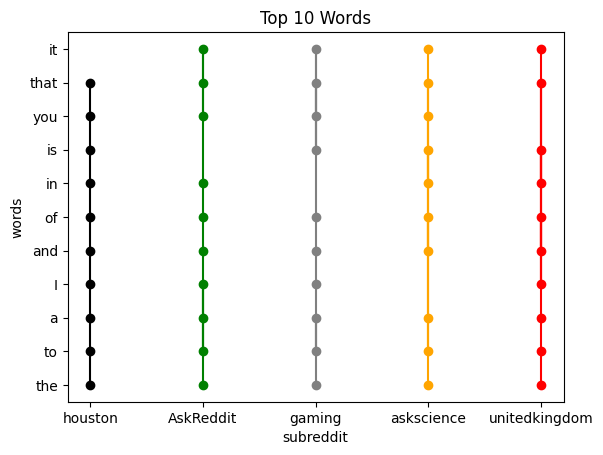

In [69]:
fig, ax = plt.subplots()

#Plot the data
ax.plot(houstonCount['subreddit'], houstonCount['word'], label='houston', color='black', marker='o')
ax.plot(AskRedditCount['subreddit'], AskRedditCount['word'], label='AskReddit', color='green', marker='o')
ax.plot(gamingCount['subreddit'], gamingCount['word'], label='gaming', color='grey', marker='o')
ax.plot(askscienceCount['subreddit'], askscienceCount['word'], label='askscience', color='orange', marker='o')
ax.plot(unitedkingdomCount['subreddit'], unitedkingdomCount['word'], label='unitedkingdom', color='red', marker='o')

# Add labels and legend
ax.set_xlabel('subreddit')
ax.set_ylabel('words')
ax.set_title('Top 10 Words')

# Show the plot
plt.show()

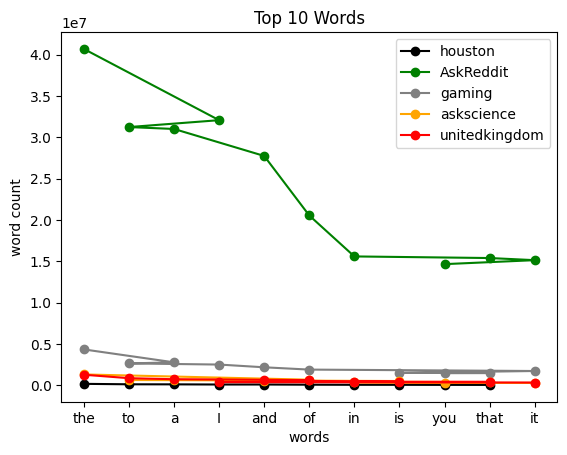

In [77]:
fig, ax = plt.subplots()

#Plot the data
ax.plot(houstonCount['word'], houstonCount['word_count'], label='houston', color='black', marker='o')
ax.plot(AskRedditCount['word'], AskRedditCount['word_count'], label='AskReddit', color='green', marker='o')
ax.plot(gamingCount['word'], gamingCount['word_count'], label='gaming', color='grey', marker='o')
ax.plot(askscienceCount['word'], askscienceCount['word_count'], label='askscience', color='orange', marker='o')
ax.plot(unitedkingdomCount['word'], unitedkingdomCount['word_count'], label='unitedkingdom', color='red', marker='o')

# Add labels and legend
ax.set_xlabel('words')
ax.set_ylabel('word count')
ax.set_title('Top 10 Words')
ax.legend()

# Show the plot
plt.show()

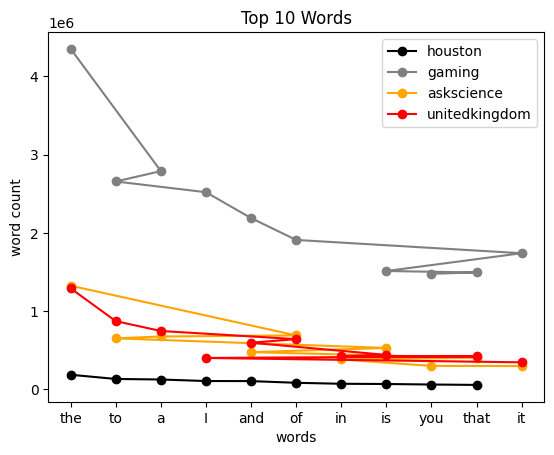

In [79]:
fig, ax = plt.subplots()

#Plot the data
ax.plot(houstonCount['word'], houstonCount['word_count'], label='houston', color='black', marker='o')
ax.plot(gamingCount['word'], gamingCount['word_count'], label='gaming', color='grey', marker='o')
ax.plot(askscienceCount['word'], askscienceCount['word_count'], label='askscience', color='orange', marker='o')
ax.plot(unitedkingdomCount['word'], unitedkingdomCount['word_count'], label='unitedkingdom', color='red', marker='o')

# Add labels and legend
ax.set_xlabel('words')
ax.set_ylabel('word count')
ax.set_title('Top 10 Words')
ax.legend()

# Show the plot
plt.show()

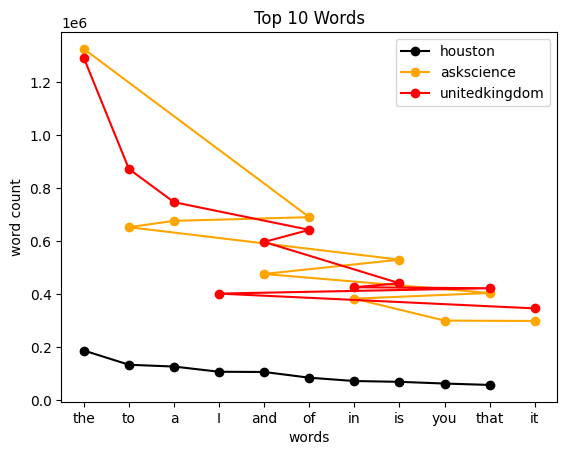

In [80]:
fig, ax = plt.subplots()

#Plot the data
ax.plot(houstonCount['word'], houstonCount['word_count'], label='houston', color='black', marker='o')
ax.plot(askscienceCount['word'], askscienceCount['word_count'], label='askscience', color='orange', marker='o')
ax.plot(unitedkingdomCount['word'], unitedkingdomCount['word_count'], label='unitedkingdom', color='red', marker='o')

# Add labels and legend
ax.set_xlabel('words')
ax.set_ylabel('word count')
ax.set_title('Top 10 Words')
ax.legend()

# Show the plot
plt.show()

What are the `top 10` **most frequent words** in **each** of the **five subreddits**
above? Do you see `differences/similarities?`

- The top 10 most frequent words in each of the 5 subreddits are in tables above.

- All subreddits show similar common words, confirming their role as the backbone of English Language construction and the subreddit's dominant language of use. Their usage frequency however reflects differences in the nature of discussions and interactions within each subreddit.

- "The" is the most frequent word in all 5 subreddits. This indicates that users are often referring to specific things or ideas, which is a common aspect of written and spoken communication. Similarly, the consistent ranking of "to" within the top four words across these subreddits suggests that users are frequently talking about actions, intentions, or directions, which are typical in discussions, storytelling, or sharing information.

- One such observation is within the askscience subreddit where the top 10 most frequent words in the subreddit omits "i".  This is unlike the other 4 subreddits who all have "i" in their top 10 most frequent words. This could be because of the discussions being of scientific nature, posing questions, hypothesizing, or citing studies, which would naturally reduce the use of first-person singular pronouns.

- Another observation is the the absence of "is" in AskReddit subreddit in the top 10 most frequent words. "Is" is used in statements of definition, identity, or existence. Its absence in the top 10 words of AskReddit may indicate a dynamic, diverse range of discussions that are not solely focused on defining or explaining concepts but rather on asking questions and sharing experiences, where verbs other than "is" might be more prevalent.

- The absence of "it" in houston subreddit in the top 10 most frequent words. The pronoun "it" is typically used to refer to a thing previously mentioned or easily identified in the context. The lack of "it" among the most frequently used words in the houston subreddit could suggest that discussions are perhaps more focused on specific names, places, or events rather than abstract concepts or objects that would require referencing with "it."

- The absence of in" in the gaming subreddit in the top 10 most frequent words. The word "in" is often used to indicate inclusion, location, or position within a space. Its absence from the top 10 in a subreddit about gaming could imply that the language is more action-oriented or focused on other aspects of gaming that don't specifically relate to the position or location within games or the gaming community. It may reflect a trend towards discussing titles, platforms, or experiences rather than in-game content.

- The presence of "I" within the top 10 frequent words of the unitedkingdom subreddit suggests a personal touch in the discussions, indicating that users frequently share personal opinions, experiences, or narratives related to the topics at hand. Despite the likely focus on national issues, news, and discussions of public interest, the usage of "I" denotes a level of personal engagement and individual perspective in the conversations.

- In contrast, the absence of "you" from the top 10 in the same subreddit indicates that while users are sharing personal experiences or viewpoints, they may not be directly addressing others or asking questions as frequently as might be seen in other communities. This can mean that discussions are perhaps less interactive on a personal level and more declarative, with people stating their own views rather than engaging in back-and-forth dialogues.

What does the `word-frequency distribution` look like? Plot the relative frequencies of the words as a probability density function. What can you say about the word frequency you observed and the predicted by the Zipf’s Law (https://en.wikipedia.org/wiki/Zipf%27s_law)

In [1]:
%%bigquery CombinedCount

WITH WordCounts AS (
  SELECT
    word,
    COUNT(*) AS word_count
  FROM (
    SELECT
      SPLIT(REGEXP_REPLACE(body, r'[^a-zA-Z\s]', ''), ' ') AS words
    FROM
      `fh-bigquery.reddit_comments.2014`
    WHERE
      subreddit IN ('AskReddit','houston', 'gaming', 'askscience', 'unitedkingdom')
  ) AS word_table
  CROSS JOIN
    UNNEST(words) AS word
  WHERE
    LENGTH(word) > 0
  GROUP BY
    word
)

SELECT
  word,
  word_count
FROM
  WordCounts
ORDER BY
  word_count DESC
;

Query is running:   0%|          |

Downloading:   0%|          |

In [2]:
CombinedCount.head()

,word,word_count
0,the,47852956
1,to,35561031
2,a,35355548
3,I,35273757
4,and,31120706


Calculating best minimal value for power law fit


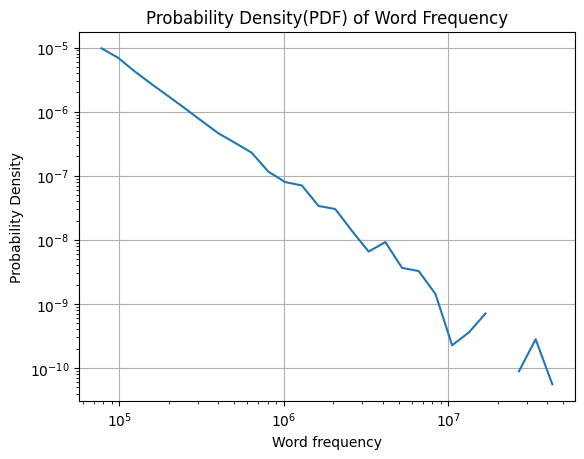

In [16]:
# Fit the data to a power-law distribution
unique_words = CombinedCount['word_count'].values

fit = powerlaw.Fit(unique_words)

fit.plot_pdf()
plt.xlabel("Word frequency")
plt.ylabel("Probability Density")
plt.title("Probability Density(PDF) of Word Frequency")
plt.grid()
plt.show()

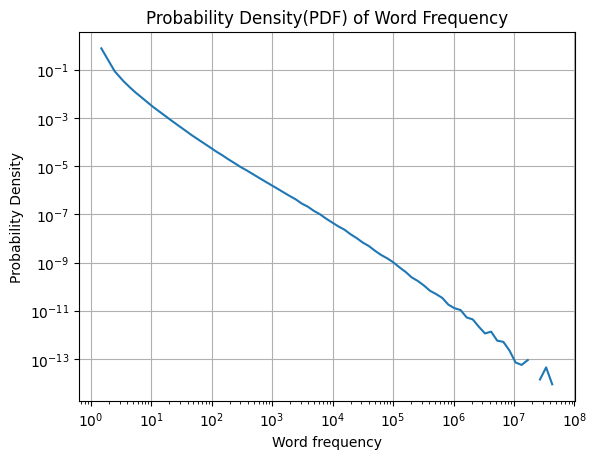

In [14]:
#Unfitted Plot
powerlaw.plot_pdf(unique_words)
plt.xlabel("Word frequency")
plt.ylabel("Probability Density")
plt.title("Probability Density(PDF) of Word Frequency")
plt.grid()
plt.show()

What does the `word-frequency distribution` look like? Plot the relative frequencies of the words as a probability density function. What can you say about the word frequency you observed and the predicted by the Zipf’s Law (https://en.wikipedia.org/wiki/Zipf%27s_law)

- Zipf's Law states that the frequency of any word is inversely proportional to its rank in the frequency table. 

- As the word frequency increases, the number of words that can potentially have exactly that frequency decreases, especially since there's a limited number of words that can be extremely common. Therefore, the probability density for encountering such high-frequency words decreases.

- While many words may appear once or twice in a text (giving a higher density at the lower frequency end), only a few words (like "the", "is", "at") will appear thousands or tens of thousands of times. So, while these words have a high absolute frequency, the density—the likelihood of picking one of them at random is actually lower because there are fewer such high-frequency words.

- We can say that the graph has adherence to Zipf's Law, showing that the frequency of a word is inversely proportional to its rank, in this case the higher the frequency, the lower the rank. There is some deviation from the ideal distribution towards the end where the word frequency is at it's peak, however that is expected from real-world data as it isn't an ideal world. The overall downward trend of the graph suggests that fewer words have extremely high frequency (a characteristic consistent with Zipf's Law).

- The deviations we see might be due to the different topics within each subreddit causing differing speech patterns within each subreddit.